# 자연어와 원유의 이야기

- 데이터 분석 목적: 뉴스의 자연어를 분석하여 다음을 예측
    - 원유 가격 등락 여부 예측
    - 원유 가격 절댓값 예측
    - 원유 가격 증감율 예측

## 1. 전처리

전처리 작업 요약
1. 네이버 언론사 목록 정하기
2. 날짜 구간 정하기
3. 특정 날짜의 언론사 페이지(pass1)의 링크 리스트 구하기
4. pass1의 링크로 이동해서 각 기사의 링크(pass2) 목록을 저장
5. pass2의 기사 내용 크롤링
6. 기사 내용 자연어 전처리

### 1-1. 전처리 함수

- 특정 날짜의 특정 언론사 기사 포털 링크를 구하기.

In [ ]:
# import pandas as pd
# from datetime import datetime, timedelta

# def get_link_pass1(start, end, press):
#     start_date = datetime.strptime(start, "%Y-%m-%d")
#     end_date = datetime.strptime(end, "%Y-%m-%d")

#     timeline = [start_date + timedelta(days=i) for i in range((end_date - start_date).days)]
#     base_link = 'https://media.naver.com/press/'

#     links_pass1 = [] # [datetime, link]

#     for press_code in press.values():
#         for date in timeline:
#             if date.weekday() == 6: # except sunday
#                 continue
#             link_pass1 = base_link + press_code + '/newspaper?date=' + date.strftime('%Y%m%d') + '#lnb'
#             links_pass1.append([date, link_pass1])

#     print(links_pass1)
#     return links_pass1

# press_codes = {
#         "파이낸셜뉴스": '014',
#         "한국경제": '015'
#     }

# links_pass1 = get_link_pass1('2024-12-04', '2024-12-05', press_codes)
# links_pass1

- 위에서 구한 각 언론사의 링크를 방문하며 세부 기사 링크 크롤링

In [ ]:

# import requests
# from bs4 import BeautifulSoup

# def bring_link_pass2(link_pass1):
#     """return the links of each articles using link_pass1 with the date info.

#     Args:
#         link_pass1 (list): [date, link] like 2 dimensional list

#     Returns:
#         : [date, [link1, link2]] like 2 dimensional list
#     """
#     headers = {'User-Agent': 'Mozilla/5.0'} # ok
#     response = requests.get(link_pass1, headers=headers) #
#     print(response)
#     soup = BeautifulSoup(response.text, 'lxml')
#     tmp = soup.select('.newspaper_brick_item  a[href]')
#     links = [link['href'] for link in tmp]
#     return links[:len(links)//6] # 좀 자를까?

# links_pass2 = [] # datetime, article

# for date, link in links_pass1:
#     link_tmp = bring_link_pass2(link)
#     links_pass2.append([date, link_tmp])

# links_pass2

- 위에서 구한 각 기사의 링크를 방문하며 기사 내용 크롤링

In [ ]:
# from urllib import request
# from bs4 import BeautifulSoup
# import re
# from konlpy.tag import Okt

# def scrap_one_article(url):
#     try:
#         # URL 열기
#         with request.urlopen(url) as f:
#             # 기본적으로 UTF-8로 디코딩 시도
#             try:
#                 html = f.read().decode('utf-8')
#             except UnicodeDecodeError:
#                 # UTF-8 실패 시 EUC-KR 시도
#                 try:
#                     html = f.read().decode('euc-kr')
#                 except UnicodeDecodeError:
#                     # EUC-KR도 실패하면 Latin-1로 시도
#                     html = f.read().decode('latin1')

#         # BeautifulSoup로 HTML 파싱
#         bs = BeautifulSoup(html, "lxml")

#         # 기사 내용 추출
#         article = bs.select_one('#newsct_article').text if bs.select_one('#newsct_article') else ' '
#         return article

#     except Exception as e:
#         # 기타 예외 처리
#         print(f"Error fetching or parsing the article from {url}: {e}")
#         return ''

# def clean_text_data(data_point):
#     article_soup = BeautifulSoup(data_point) #? why do it called soup?
#     article_text = article_soup.get_text()
#     article_letters_only = re.sub("[^가-힣a-zA-Z]", " ", article_text)
#     okt = Okt()
#     korean_stopwords = ['이', '그', '저', '의', '가', '에', '를', '은', '는', '과', '와', '도', '으로', '로', '에게', '에서', '더', '만']
#     tokens = okt.morphs(article_letters_only)
#     meaningful_words = [w for w in tokens if w not in korean_stopwords]
#     return (" ".join(meaningful_words))

#     # if( (i)%2000 == 0): #? 매개변수에 i가 직접 있는게 아니라 data_point 매개변수 안에 있는 i에 접근할 수 있구나. 직접 i를 줘도 상관 없긴 하겠네.
#     #     #? 그래서 이 코드는 역할이 뭐지? i가 2000이 될 때마다, 해당 내용을 출력. 포매팅 함수의미는 (현재 데이터의 인덱스, 데이터의 전체 크기, 백분율)
#     #     print("Cleaned %d of %d data (%d %%.)" % (i, data_size, ((i)/data_size)*100))


# def create_document_dict():
#     result = {
#         'Date': [],
#         'Article': []
#     }
#     for date, links in links_pass2:
#         result['Date'].append(date)
#         article = ''
#         for link in links:
#             article_tmp = scrap_one_article(link)
#             article_tmp = clean_text_data(article_tmp)
#             article += article_tmp
#         result['Article'].append(article)
#     return result

# art_map = create_document_dict()
# print(art_map)

- 지금까지 구한 데이터를 날짜, 기사 형식의 데이터프레임으로 만들기.

In [ ]:
# df_article = pd.DataFrame(art_map)
# df_article.head()

- 기사와 원유 데이터프레임 병합

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 25.9 MB/s eta 0:00:00



### 1-2. 크롤링 함수 리팩터링

In [ ]:
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from urllib import request as url_request

def get_articles(start_date_str, end_date_str, press_codes):
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

    timeline = [start_date + timedelta(days=i) for i in range((end_date - start_date).days)]
    base_link = 'https://media.naver.com/press/'

    links_pass1 = []  # [date, link]
    for press_code in press_codes.values():
        for date in timeline:
            if date.weekday() == 6:  # 일요일 제외
                continue
            link_pass1 = f"{base_link}{press_code}/newspaper?date={date.strftime('%Y%m%d')}#lnb"
            links_pass1.append([date, link_pass1])

    def bring_link_pass2(link_pass1):
        """각 날짜와 언론사의 기사 링크들을 반환합니다."""
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(link_pass1, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        tmp = soup.select('.newspaper_brick_item a[href]')
        links = [link['href'] for link in tmp]
        return links[:len(link)//10]  # 필요한 경우 링크 수를 제한할 수 있습니다.

    links_pass2 = []  # [date, [link1, link2, ...]]
    for date, link in links_pass1:
        link_tmp = bring_link_pass2(link)
        links_pass2.append([date, link_tmp])

    def scrap_one_article(url):
        try:
            with url_request.urlopen(url) as f:
                try:
                    html = f.read().decode('utf-8')
                except UnicodeDecodeError:
                    try:
                        html = f.read().decode('euc-kr')
                    except UnicodeDecodeError:
                        html = f.read().decode('latin1')

            bs = BeautifulSoup(html, "lxml")
            article = bs.select_one('#newsct_article').text if bs.select_one('#newsct_article') else ' '
            return article
        except Exception as e:
            print(f"{url}에서 기사를 가져오거나 파싱하는 데 실패했습니다: {e}")
            return ''

    def clean_text_data(data_point):
        article_soup = BeautifulSoup(data_point, 'lxml')
        article_text = article_soup.get_text()
        article_letters_only = re.sub("[^가-힣a-zA-Z]", " ", article_text)
        okt = Okt()
        korean_stopwords = ['이', '그', '저', '의', '가', '에', '를', '은', '는', '과', '와', '도', '으로', '로', '에게', '에서', '더', '만']
        tokens = okt.morphs(article_letters_only)
        meaningful_words = [w for w in tokens if w not in korean_stopwords]
        return " ".join(meaningful_words)

    result = {
        'Date': [],
        'Article': []
    }
    print("========================")
    print("finished getting response.")

    for idx, (date, links) in enumerate(links_pass2):
        # 진행상태 확인
        if idx % 120 == 0:
            print(date)
        result['Date'].append(date)
        article = ''
        for link in links:
            article_tmp = scrap_one_article(link)
            article_tmp = clean_text_data(article_tmp)
            article += article_tmp
        result['Article'].append(article)

    df_article = pd.DataFrame(result)
    return df_article

- 함수를 사용하여 데이터프레임 생성 및 추출

In [ ]:
press_codes = {
    "파이낸셜뉴스": '014',
    "한국경제": '015',
    "서울경제": '011',
    "매일경제": '009',
    "머니투데이": '008'
}

# df_article = get_articles('2011-01-01', '2024-12-05', press_codes)
# df_article.to_csv('articles.csv', index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
df_article = pd.read_csv("/content/drive/My Drive/24-2_BigData/articles.csv")

- 자연어 데이터 수집 과정 끝


데이터 프레임 형식

| Date | Article
|---|---
|기사 작성 날짜| 기사 내용


In [ ]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21800 entries, 0 to 21799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     21800 non-null  object
 1   Article  19476 non-null  object
dtypes: object(2)
memory usage: 340.8+ KB


In [ ]:
df_article['Article'] = df_article['Article'].astype(str)

In [ ]:
# change yyyy-mm-dd type of object data into datetime at the df_article.Date

df_article['Date'] = pd.to_datetime(df_article['Date'])
df_article.info

<bound method DataFrame.info of             Date                                            Article
0     2011-01-01                                                nan
1     2011-01-03                                                nan
2     2011-01-04                                                nan
3     2011-01-05                                                nan
4     2011-01-06                                                nan
...          ...                                                ...
21795 2024-11-29  종합 한 내년 성장 률 전 망치 서울 뉴시스 사진 공동 취재 단 이창용 한국은행 총...
21796 2024-11-30                                                nan
21797 2024-12-02  the 서울 뉴시스 국회 사진기 자단 박찬 대 왼쪽 더불어 민주당 원내대표 추경호 ...
21798 2024-12-03  최상 목 부총리 등 주요 부처 장관 들 입장 문 발표 예산안 일 본회의 상정 되지 ...
21799 2024-12-04  기사 나온 스타트업 대한 보다 다양한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 데이...

[21800 rows x 2 columns]>

### 1-3. 원유 데이터 수집

- 날짜별 유가 증감 여부를 나타내는 데이터프레임 구하기

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

def get_crude_oil_prices(start_date, end_date):
    # WTI Crude Oil symbol in Yahoo Finance
    ticker = "CL=F"

    # Fetch data using yfinance
    crude_data = yf.download(ticker, start=start_date, end=end_date)

    # Select 'Adj Close' column for daily adjusted close prices
    crude_prices = crude_data[['Adj Close']].reset_index()
    crude_prices.columns = ['Date', 'Price']

    return crude_prices

start_date = '2010-12-01'
end_date = "2024-12-06"
crude_prices = get_crude_oil_prices(start_date, end_date)

# 전일 대비 증감율 계산
crude_prices['Change (%)'] = crude_prices['Price'].pct_change() * 100

# 증감율이 양수면 1, 음수면 0을 표시하는 새로운 열 추가
crude_prices['Increase'] = np.where(crude_prices['Change (%)'] > 0, 1, 0)

# 결과 출력
print(crude_prices)

[*********************100%***********************]  1 of 1 completed

           Date      Price  Change (%)  Increase
0    2010-12-01  86.750000         NaN         0
1    2010-12-02  88.000000    1.440922         1
2    2010-12-03  89.190002    1.352276         1
3    2010-12-06  89.379997    0.213023         1
4    2010-12-07  88.690002   -0.771979         0
...         ...        ...         ...       ...
3521 2024-11-29  68.000000   -1.277580         0
3522 2024-12-02  68.099998    0.147057         1
3523 2024-12-03  69.940002    2.701915         1
3524 2024-12-04  68.540001   -2.001718         0
3525 2024-12-05  68.300003   -0.350157         0

[3526 rows x 4 columns]


In [ ]:
crude_prices

,Date,Price,Change (%),Increase
0,2010-12-01,86.750000,NaN,0
1,2010-12-02,88.000000,1.440922,1
2,2010-12-03,89.190002,1.352276,1
3,2010-12-06,89.379997,0.213023,1
4,2010-12-07,88.690002,-0.771979,0
...,...,...,...,...
3521,2024-11-29,68.000000,-1.277580,0
3522,2024-12-02,68.099998,0.147057,1
3523,2024-12-03,69.940002,2.701915,1
3524,2024-12-04,68.540001,-2.001718,0


- 원유 데이터 수집 완료

### 1-4. 데이터 프레임 병합

- 두 데이터프레임 병합

In [ ]:
merged_df = pd.merge(df_article, crude_prices, on='Date', how='inner')  # 'inner'를 사용하여 공통 날짜만 포함
merged_df = merged_df[merged_df.Article != ''] # 기사가 비어있는 열을 삭제
merged_df

,Date,Article,Price,Change (%),Increase
0,2011-01-03,nan,91.550003,0.186043,1
1,2011-01-04,nan,89.379997,-2.370296,0
2,2011-01-05,nan,90.300003,1.029320,1
3,2011-01-06,nan,88.379997,-2.126252,0
4,2011-01-07,nan,88.029999,-0.396015,0
...,...,...,...,...,...
17510,2024-11-28,최상 목 부총리 앞 개월 우리 산업 운명 가를 골든타임 성남 뉴스 김영운 기자 최상...,68.879997,0.232823,1
17511,2024-11-29,종합 한 내년 성장 률 전 망치 서울 뉴시스 사진 공동 취재 단 이창용 한국은행 총...,68.000000,-1.277580,0
17512,2024-12-02,the 서울 뉴시스 국회 사진기 자단 박찬 대 왼쪽 더불어 민주당 원내대표 추경호 ...,68.099998,0.147057,1
17513,2024-12-03,최상 목 부총리 등 주요 부처 장관 들 입장 문 발표 예산안 일 본회의 상정 되지 ...,69.940002,2.701915,1


### 1-4. 추가적인 데이터 전처리 및 시각화

In [ ]:
# article 빈 열은 제거.
df = merged_df[merged_df["Article"] != '']
df

,Date,Article,Price,Change (%),Increase
0,2011-01-03,nan,91.550003,0.186043,1
1,2011-01-04,nan,89.379997,-2.370296,0
2,2011-01-05,nan,90.300003,1.029320,1
3,2011-01-06,nan,88.379997,-2.126252,0
4,2011-01-07,nan,88.029999,-0.396015,0
...,...,...,...,...,...
17510,2024-11-28,최상 목 부총리 앞 개월 우리 산업 운명 가를 골든타임 성남 뉴스 김영운 기자 최상...,68.879997,0.232823,1
17511,2024-11-29,종합 한 내년 성장 률 전 망치 서울 뉴시스 사진 공동 취재 단 이창용 한국은행 총...,68.000000,-1.277580,0
17512,2024-12-02,the 서울 뉴시스 국회 사진기 자단 박찬 대 왼쪽 더불어 민주당 원내대표 추경호 ...,68.099998,0.147057,1
17513,2024-12-03,최상 목 부총리 등 주요 부처 장관 들 입장 문 발표 예산안 일 본회의 상정 되지 ...,69.940002,2.701915,1


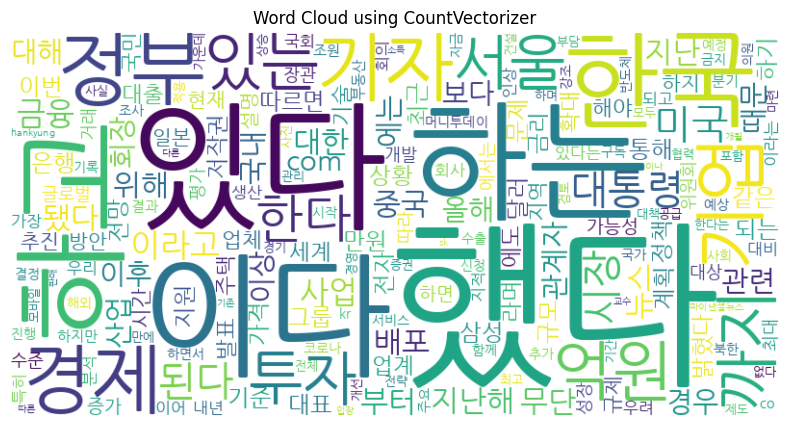

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 데이터 준비
text_data = df['Article']  # df['Article']는 기사 텍스트 열

# CountVectorizer로 단어 빈도 계산
vectorizer = CountVectorizer(max_features=5000)  # 상위 5000개 단어만 사용
X = vectorizer.fit_transform(text_data)

# 단어와 빈도 가져오기
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",  # 한글 폰트 경로
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud using CountVectorizer")
plt.show()

In [ ]:
# 추가적인 불용어 제거
stop_words = ['있다', '대해', '있는', '기자', '때문', '하고', '했다', '이다', '하는', '된다',
              '때문' 'hankyung', '위해', '해야', '있다는', '구독', '따르면', '설명', '에도',
              '라며', 'kr', '특히', '따른', '이어', '경우', '밝혔다', '까지', 'co', '되는',
              '이라고', 'com', '대한', '에는', '보다', '강조', '하며', '한다', '됐다', '이라는',
              '없다', '됐다', '통해', '머니투데이', '무단', '저작권', '하면', '예상', '에서는',
              '뉴스']

# 불용어 제거 함수
def remove_stop_words(text):
    # 공백 기준으로 단어 분리
    words = text.split()
    # 불용어가 아닌 단어만 선택
    filtered_words = [word for word in words if word not in stop_words]
    # 단어들을 다시 공백으로 결합
    return " ".join(filtered_words)

# DataFrame의 'Article' 열에서 불용어 제거
df['Article'] = df['Article'].apply(remove_stop_words)

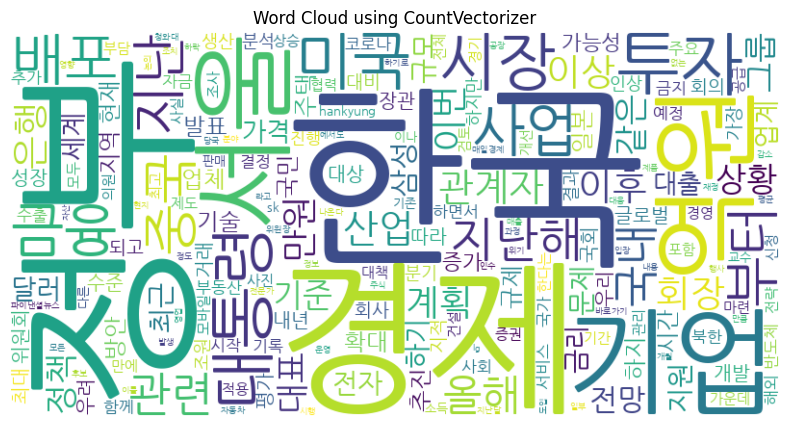

In [ ]:
# 텍스트 데이터 준비
text_data = df['Article']  # df['Article']는 기사 텍스트 열

# CountVectorizer로 단어 빈도 계산
vectorizer = CountVectorizer(max_features=5000)  # 상위 5000개 단어만 사용
X = vectorizer.fit_transform(text_data)

# 단어와 빈도 가져오기
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",  # 한글 폰트 경로
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud using CountVectorizer")
plt.show()

In [ ]:
df = df[df["Article"] != 'nan']
df

,Date,Article,Price,Change (%),Increase
14,2011-01-24,정치권 지금 공짜 전쟁 중 차기 대통령선거 년 남짓 남은 상황 정치 번지 인 여의도...,87.870003,-1.391536,0
15,2011-01-25,양곤 미얀마 김성원 아시아 마지막 남은 미개발 국가 인 미얀마 한국 기업 러브콜 을...,86.190002,-1.911916,0
16,2011-01-26,파이낸셜뉴스 특별 취재 팀 지난 일 인터넷 광고 메신저 해커 접선 해 현금 만원 을...,87.330002,1.322658,1
17,2011-01-27,은행 예 대 마진 대출 금리 예금 금리 뺀 예 대금 리차 임원 보수 제한 등 을 골...,85.639999,-1.935191,0
18,2011-01-28,대우조선 해양 말레이시아 총 사업 비 억 달러 규모 부유 식 액화천연가스 생산 장하...,89.339996,4.320407,1
...,...,...,...,...,...
17510,2024-11-28,최상 목 부총리 앞 개월 우리 산업 운명 가를 골든타임 성남 김영운 최상 목 부총리...,68.879997,0.232823,1
17511,2024-11-29,종합 한 내년 성장 률 전 망치 서울 뉴시스 사진 공동 취재 단 이창용 한국은행 총...,68.000000,-1.277580,0
17512,2024-12-02,the 서울 뉴시스 국회 사진기 자단 박찬 대 왼쪽 더불어 민주당 원내대표 추경호 ...,68.099998,0.147057,1
17513,2024-12-03,최상 목 부총리 등 주요 부처 장관 들 입장 문 발표 예산안 일 본회의 상정 되지 ...,69.940002,2.701915,1


### 2-1. 뉴스 기사 벡터화
- 벡터화

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(df["Article"], df["Increase"], test_size = 0.3, random_state=42) #cv stands for cross-validation

In [ ]:
X_train

,Article
6802,정부 년 만에 플랜트 고용 규제 완화 최대 명 유입 인력 난 해소 공 사비 절감 효...
11518,서울 용산구 한남동 용산 주 한 미군 이전 용지 최고 m 높이 빌딩 을 포함 한 업...
9808,건설업 계 원자재 대란 직격탄 단가 안 올리면 내달 부터 단체행동 철근콘크리트 건설...
2398,일만 대 국회 개원연설 서울 뉴시스 박영태 문재인 대통령 일 오후 서울 여의도 국회...
285,한진 중공업 장기간 파업 사태 이후 일감 없어 생존 을 위 한 몸부림 을 치고 부산...
...,...
14704,송지유 우리 보는 세상 본문 이미지 영역 며칠 전 만난 한 유통업체 임원 이번 국정...
5500,정의선 총괄 수석 부회장 년 만대 생산 체제 수소 산업 퍼스트 무버 되겠다 장 창민...
890,서울 삼성동 한전 부지 매각 안 확정 불 붙은 쟁탈전 개발 카드 내놓은 현대차 냐 ...
17167,MT 리포트 플라스틱 돌리는 경제 회 화학 재활용 온다 편집 자주 신의 선물 인류 ...


In [ ]:
X_cv

,Article
6757,전국 개 병원 유통 최소 명의 환자 두께 정상 제품 절반 인 불량 아킬레스건 수술 ...
8892,대통령 순방 때 대거 동행 재계 관계 개선 기 대감 서울 경제 문재인 대통령 인도 ...
6355,AT T 자회사 주식 과세 놓고 해석 제각각 삼성 NH 신한 세금 떼 키움 등 사실...
10333,딥임팩트 차이나 쇼크 중기 직구 매출 피해 선진국 수준 제품 글로벌 잠식 유통 망 ...
17244,서울 뉴시스 황준 선 일 서울 시내 한 대형 마트 장 을 보는 시민 들 모습 국내외...
...,...
7819,금융기관 규제 완화 이후 사고 땐 최대 영업정지 끝장 토론 건 중 건 수용 건 상반...
6189,한경 글로벌 마켓 주요 증권사 개 종목 추천 사진 게티 이미지 뱅크 꿈 주식 불리는...
6886,불 붙는 AI 반도체 특허전쟁 SK 하이닉스 로부터 여 개 반도체 관련 특허 넘겨받...
6467,올라 CPI 상승 모두 시장 전 망치 웃 돌아 미국 소비자 물가 지수 CPI 시장 ...


In [ ]:
# count vectorize X_train data
X_train = vectorizer.fit_transform(X_train) #?
X_train = X_train.toarray()
X_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 4, 25,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
# count vectorize x cross validation data
X_cv = vectorizer.transform(X_cv) #?
X_cv = X_cv.toarray()
X_cv.shape

(5255, 5000)

In [ ]:
# count vectorize x_test data
X_test = vectorizer.transform(merged_df.Article) #?
X_test = X_test.toarray()
X_test.shape

(17515, 5000)

In [ ]:
vocab = vectorizer.get_feature_names_out()
print(f"Printing first 100 vocabulary samples:\n{vocab[:1000]}")

Printing first 100 vocabulary samples:
['aa' 'afp' 'ai' 'all' 'ap' 'bmw' 'bp' 'cb' 'ceo' 'ces' 'cj' 'class'
 'copyright' 'covid' 'cp' 'cube' 'db' 'dc' 'decenter' 'ds' 'dsr' 'dti'
 'ecb' 'els' 'esg' 'etf' 'eu' 'fed' 'first' 'fn' 'fnnews' 'fomc' 'ft'
 'fta' 'gb' 'gdp' 'girl' 'gm' 'gpt' 'gs' 'gtx' 'hankooki' 'hankyung' 'hbm'
 'hot' 'ib' 'icbm' 'ict' 'im' 'imf' 'iot' 'ip' 'ipo' 'it' 'jp' 'kaist'
 'kb' 'kdb' 'kdi' 'keb' 'kg' 'km' 'kt' 'ktx' 'lcd' 'led' 'lg' 'lh' 'lig'
 'lng' 'lte' 'ltv' 'mb' 'mbk' 'mk' 'mou' 'ms' 'mt' 'my' 'mz' 'nan' 'news'
 'newsis' 'nh' 'no' 'nsc' 'oecd' 'oled' 'os' 'pb' 'pc' 'pe' 'pef' 'pf'
 'reserved' 'rights' 'sdi' 'sed' 'sedaily' 'signal' 'sk' 'sm' 'sns' 'soc'
 'spc' 'stx' 'suv' 'sw' 'tf' 'the' 'tom' 'tpp' 'tsmc' 'tv' 'uae' 'vc' 'vr'
 'vs' 'wsj' 'wti' 'wto' 'www' '가가' '가게' '가격' '가결' '가계' '가계부채' '가고' '가공'
 '가교' '가구' '가까운' '가까이' '가는' '가늠' '가능' '가능성' '가능하다' '가능하다는' '가능한' '가능할'
 '가닥' '가동' '가뜩이나' '가량' '가로' '가를' '가맹' '가면' '가사' '가산' '가상' '가상한' '가세' '가속'
 '가수' '가스' '가슴' '가시' 

In [ ]:
import numpy as np

distribution = np.sum(X_train, axis=0) # column을 기준으로 sum 연산. 각 열 벡터 합을 구하여 단어의 빈도를 확인할 수 있음.

print("Printing first 100 vocab-dist paris:")
for tag, count in zip(vocab[-1:-100: -1], distribution[-1:-100:-1]):
    print(count, tag)

Printing first 100 vocab-dist paris:
764 힘들다
1301 힘든
785 희생
3937 희망
692 흥행
769 흡수
2634 흑자
3654 흐름
719 휴일
882 휴업
2678 휴대폰
1492 휴가
967 휘발유
1310 훼손
2408 훨씬
969 훌쩍
1945 훈련
666 후퇴
862 후임
1047 후원
2031 후속
5039 후보자
16245 후보
966 후반
3959 효율
856 효성
707 효력
12732 효과
1084 횡령
685 횟수
564 획득
785 획기
874 회피
37052 회장
22480 회의
3425 회원
2322 회수
2252 회생
3091 회사채
22054 회사
8656 회복
645 회로
829 회동
4529 회담
1166 회관
1207 회계법인
550 회계기준
3072 회계
11695 활용
7748 활성화
7299 활동
7918 환자
8237 환율
737 환원
1461 환영
913 환수
656 환산
736 환매
949 환급
1927 환경부
9527 환경
2738 확충
1557 확진
7992 확정
3949 확장
13597 확인
658 확실히
1402 확실한
799 확신
10024 확산
14048 확보
585 확립
741 확률
28563 확대
844 화했다
1066 화해
2379 화할
3710 화학
578 화하면서
1808 화하는
760 화하기
3066 화폐
1401 화제
1920 화재
2175 화장품
848 화이자
1314 화웨이
1235 화성
1648 화물
1343 화면
717 화로
781 화두
603 화답
1442 화가
3480 홍콩
1869 홍보
627 홈플러스
1978 홈페이지
992 홈쇼핑


### 2-2. 클래스 분류: 뉴스기사 - 유가 증감 여부

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier()
forest = forest.fit(X_train, Y_train)

In [ ]:
predictions = forest.predict(X_cv)
accuracy_score(Y_cv, predictions)

0.5242626070409134

- 클래스 분류 시 정확도가 매우 낮음을 확인할 수 있다

### 클래스 분류 정확도를 개선하기 위한 추가 작업

- 원유와 관련된 키워드만 고려하여 학습

In [ ]:
keywords = ["원유"]

filtered_df = merged_df

filtered_df['is_relevant'] = merged_df['Article'].apply(lambda x: any(keyword in x for keyword in keywords))
filtered_df = filtered_df[filtered_df.is_relevant == True]
filtered_df


/var/folders/_6/q24yv50x5zxdy4v95gvt9w_40000gn/T/ipykernel_79588/1333015999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_relevant'] = merged_df['Article'].apply(lambda x: any(keyword in x for keyword in keywords))


,Date,Article,Price,Change (%),Increase,Tomorrow_increase,is_relevant,Increase2
18,2011-01-28,대우조선 해양 말레이시아 총 사업 비 억 달러 규모 부유 식 액화천연가스 생산 장하...,89.339996,4.320407,1,1.0,True,1
21,2011-02-02,올 초 인텔 야심 차게 출시 한 세대 코어 프로세서 샌디브리지 사용 된 보조 칩 중...,90.860001,0.099156,1,0.0,True,0
27,2011-02-10,중국 금리 인상 을 전격 단행 한 가운데 아시아 중남미 그리고 상대 적 인플레이션 ...,86.730003,0.023070,1,0.0,True,0
29,2011-02-14,산업 쌀 불리는 철 을 생산 하면서 발생 하는 이산화탄소 CO 전 세계 골칫거리 다...,84.809998,-0.899748,0,0.0,True,0
35,2011-02-23,리비아 사태 내 전 상황 치 달으면서 현지 기업 들 사업 전면 중단 되고 파견 직원...,98.099998,4.841294,1,0.0,True,1
...,...,...,...,...,...,...,...,...
17357,2024-04-23,the 서울 뉴스 오 대일 기자 윤석열 대통령 일 용산 대통령실 청사 브리핑 룸 신...,83.360001,0.615573,1,0.0,True,0
17383,2024-05-30,the MT 리포트 대 국회 대한민국 을 부탁 해 편집 자주 대 국회 역사 속 사라...,77.910004,-1.666035,0,0.0,True,0
17398,2024-06-21,리스크 시대 기업 생존 법 편집 자주 앞 잘 보이지 않는다 예상 보다 길어지는 고물...,80.730003,-1.752458,0,1.0,True,0
17451,2024-09-06,MT 리포트 이제 개월 미리 보는 미국 대선 편집 자주 우리나라 뿐 아니라 세계 경...,67.669998,-2.140280,0,1.0,True,-1


In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(filtered_df["Article"], filtered_df["Increase"], test_size = 0.3, random_state=42) #cv stands for cross-validation
# count vectorize X_train data
X_train = vectorizer.fit_transform(X_train) #?
X_train = X_train.toarray()
# count vectorize x cross validation data
X_cv = vectorizer.transform(X_cv) #
X_cv = X_cv.toarray()
# count vectorize x_test data
X_test = vectorizer.transform(merged_df.Article) #?
X_test = X_test.toarray()

forest = RandomForestClassifier()
forest = forest.fit(X_train, Y_train)

predictions = forest.predict(X_cv)
accuracy_score(Y_cv, predictions)

0.5339168490153173

- 이지선다에서 정답률이 53%, 즉 무작위 선택을 하고 있음. 여전히 매우 부정확함

---

그렇다면 증감율의 상태를 세분화해보자. 지금과 같이 상승, 하락 두 가지만 고려하지 말고, 오차범위 0.5 미만이면 변화없음(0), 증가는 1, 감소는 -1로 다시 행을 만들자.

In [ ]:
filtered_df['Increase2'] = filtered_df['Change (%)'].apply(
    lambda x: 0 if abs(x) <= 2 else (1 if x > 0 else -1)
)
filtered_df2 = filtered_df#[filtered_df.Increase2 != 0]
filtered_df2

,Date,Article,Price,Change (%),Increase,Tomorrow_increase,is_relevant,Increase2
18,2011-01-28,대우조선 해양 말레이시아 총 사업 비 억 달러 규모 부유 식 액화천연가스 생산 장하...,89.339996,4.320407,1,1.0,True,1
21,2011-02-02,올 초 인텔 야심 차게 출시 한 세대 코어 프로세서 샌디브리지 사용 된 보조 칩 중...,90.860001,0.099156,1,0.0,True,0
27,2011-02-10,중국 금리 인상 을 전격 단행 한 가운데 아시아 중남미 그리고 상대 적 인플레이션 ...,86.730003,0.023070,1,0.0,True,0
29,2011-02-14,산업 쌀 불리는 철 을 생산 하면서 발생 하는 이산화탄소 CO 전 세계 골칫거리 다...,84.809998,-0.899748,0,0.0,True,0
35,2011-02-23,리비아 사태 내 전 상황 치 달으면서 현지 기업 들 사업 전면 중단 되고 파견 직원...,98.099998,4.841294,1,0.0,True,1
...,...,...,...,...,...,...,...,...
17357,2024-04-23,the 서울 뉴스 오 대일 기자 윤석열 대통령 일 용산 대통령실 청사 브리핑 룸 신...,83.360001,0.615573,1,0.0,True,0
17383,2024-05-30,the MT 리포트 대 국회 대한민국 을 부탁 해 편집 자주 대 국회 역사 속 사라...,77.910004,-1.666035,0,0.0,True,0
17398,2024-06-21,리스크 시대 기업 생존 법 편집 자주 앞 잘 보이지 않는다 예상 보다 길어지는 고물...,80.730003,-1.752458,0,1.0,True,0
17451,2024-09-06,MT 리포트 이제 개월 미리 보는 미국 대선 편집 자주 우리나라 뿐 아니라 세계 경...,67.669998,-2.140280,0,1.0,True,-1


In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_cv, Y_train, Y_cv = train_test_split(filtered_df2["Article"], filtered_df2["Increase2"], test_size = 0.3, random_state=42) #cv stands for cross-validation

# count vectorize X_train data
X_train = vectorizer.fit_transform(X_train) #?
X_train = X_train.toarray()
# count vectorize x cross validation data
X_cv = vectorizer.transform(X_cv) #
X_cv = X_cv.toarray()

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

model1 = RandomForestClassifier(class_weight='balanced', random_state=42)
model1 = model1.fit(X_train, Y_train)


predictions = model1.predict(X_cv)
accuracy_score(Y_cv, predictions)

0.6083150984682714

- 정확도가 소폭 상승했음을 확인할 수 있다. 하지만...

In [ ]:
from sklearn.metrics import classification_report

# 예측 값과 실제 값 비교
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

          -1       0.07      0.01      0.02        82
           0       0.64      0.93      0.76       292
           1       0.24      0.05      0.08        83

    accuracy                           0.61       457
   macro avg       0.31      0.33      0.29       457
weighted avg       0.47      0.61      0.50       457



원유 가격이 증가, 감소한 경우의 recall이 매우 작다. 분류가 제대로 되고 있지 않음을 알 수 있다

*결론: 주어진 데이터로 증감여부를 판단하기 어려움*

### 2-3. 선형회귀: 뉴스기사 - 유가 절댓값

In [ ]:
regression_df = df
regression_df

,Date,Article,Price,Change (%),Increase
14,2011-01-24,정치권 지금 공짜 전쟁 중 차기 대통령선거 년 남짓 남은 상황 정치 번지 인 여의도...,87.870003,-1.391536,0
15,2011-01-25,양곤 미얀마 김성원 아시아 마지막 남은 미개발 국가 인 미얀마 한국 기업 러브콜 을...,86.190002,-1.911916,0
16,2011-01-26,파이낸셜뉴스 특별 취재 팀 지난 일 인터넷 광고 메신저 해커 접선 해 현금 만원 을...,87.330002,1.322658,1
17,2011-01-27,은행 예 대 마진 대출 금리 예금 금리 뺀 예 대금 리차 임원 보수 제한 등 을 골...,85.639999,-1.935191,0
18,2011-01-28,대우조선 해양 말레이시아 총 사업 비 억 달러 규모 부유 식 액화천연가스 생산 장하...,89.339996,4.320407,1
...,...,...,...,...,...
17510,2024-11-28,최상 목 부총리 앞 개월 우리 산업 운명 가를 골든타임 성남 김영운 최상 목 부총리...,68.879997,0.232823,1
17511,2024-11-29,종합 한 내년 성장 률 전 망치 서울 뉴시스 사진 공동 취재 단 이창용 한국은행 총...,68.000000,-1.277580,0
17512,2024-12-02,the 서울 뉴시스 국회 사진기 자단 박찬 대 왼쪽 더불어 민주당 원내대표 추경호 ...,68.099998,0.147057,1
17513,2024-12-03,최상 목 부총리 등 주요 부처 장관 들 입장 문 발표 예산안 일 본회의 상정 되지 ...,69.940002,2.701915,1


In [ ]:
# 데이터 분리
X_train, X_cv, Y_train, Y_cv = train_test_split(regression_df['Article'], regression_df['Price'], test_size=0.2, random_state=42)

# count vectorize X_train data
X_train = vectorizer.fit_transform(X_train) #?
X_train = X_train.toarray()
# count vectorize x cross validation data
X_cv = vectorizer.transform(X_cv) #
X_cv = X_cv.toarray()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 초기화
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model2.fit(X_train, Y_train)

# 예측
y_pred = model2.predict(X_cv)


- 예측 시각화

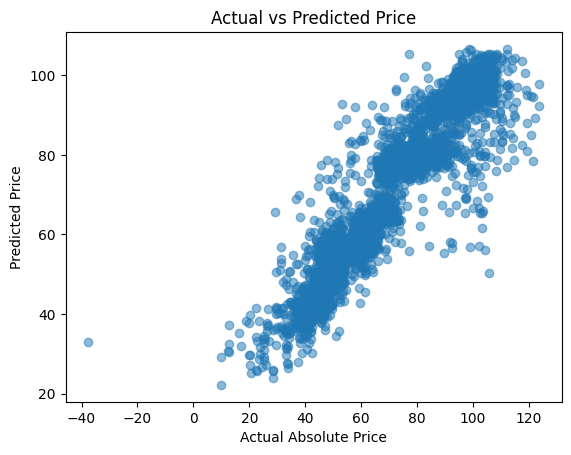

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_cv, y_pred, alpha=0.5)
plt.xlabel("Actual Absolute Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

- 클래스 분류에 비해 훨씬 유의미한 결과가 나옴을 확인할 수 있다.

아래는 추가적인 정확도 분석

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 평가
mse = mean_squared_error(Y_cv, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_cv, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")

MSE: 71.40457267007818, RMSE: 8.450122642309884, MAE: 5.670950261105679


In [ ]:
print("타겟 변수의 평균:", df.Price.mean())
print("타겟 변수의 범위:", df.Price.min(), "-", df.Price.max())

타겟 변수의 평균: 69.81260267035746
타겟 변수의 범위: -37.630001068115234 - 123.69999694824219


### 2-4. 선형회귀: 뉴스기사 - 유가 증감율

In [ ]:
# 데이터 분리
X_train, X_cv, Y_train, Y_cv = train_test_split(regression_df['Article'], regression_df['Change (%)'], test_size=0.2, random_state=42)

# count vectorize X_train data
X_train = vectorizer.fit_transform(X_train) #?
X_train = X_train.toarray()
# count vectorize x cross validation data
X_cv = vectorizer.transform(X_cv) #
X_cv = X_cv.toarray()


In [ ]:
# 모델 초기화
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model3.fit(X_train, Y_train)

# 예측
y_pred = model3.predict(X_cv)

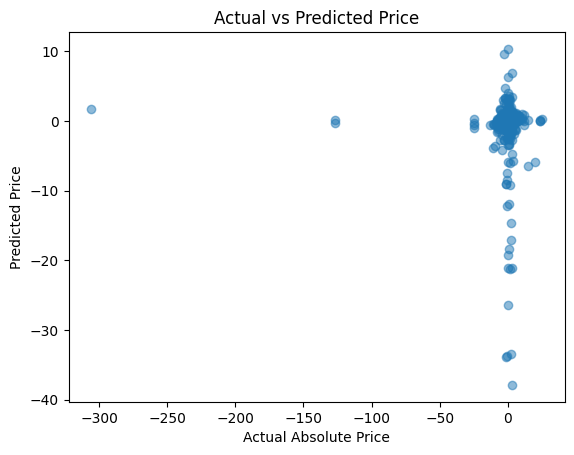

In [ ]:
plt.scatter(Y_cv, y_pred, alpha=0.5)
plt.xlabel("Actual Absolute Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

- 아웃라이어 떄문에 예측의 정확성을 확인하기 어렵다. 아웃라이어를 제거하고 다시 확인

In [ ]:
# 데이터프레임 생성
data = pd.DataFrame({'Y_cv': Y_cv, 'y_pred': y_pred})

# 아웃라이어 기준 설정 (IQR 사용)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 아웃라이어 제거
filtered_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# 아웃라이어 제거된 값
filtered_Y_cv = filtered_data['Y_cv'].values
filtered_y_pred = filtered_data['y_pred'].values

# 결과 출력
filtered_Y_cv, filtered_y_pred

(array([ 3.01549833, -2.39872729, -0.34164804, ..., -2.14094354,
         2.91866326, -0.98576289]),
 array([ 0.01208754,  0.1916035 , -0.37583065, ..., -0.24229304,
        -0.2705629 , -0.05086923]))

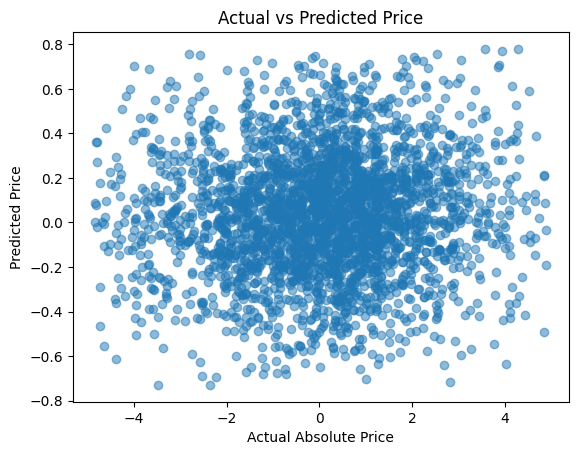

In [ ]:
plt.scatter(filtered_Y_cv, filtered_y_pred, alpha=0.5)
plt.xlabel("Actual Absolute Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

- 증감율 역시 예측이 불가능함을 확인할 수 있다.

---

## 3. 결론
- 뉴스 자연어를 바탕으로 위와 같이 세 종류의 데이터 분석을 실시해 보았다. 증감 여부를 예측하는 클래스 분류와 증감율을 예측한 선형회귀 분석은 유의미한 결과를 내지 못했으나, 절댓값은 쉽게 예측할 수 있었다.

- 원인 추측: 증감 여부와 증감율은 기본적으로 시간의 흐름과 연관성이 없는 반면, 가격의 절댓값은 특별한 경우가 아니면 오차범위를 크게 벗어나지 않는 선형적인 데이터다. 따라서 자연어에서 확인할 수 있는 시기와 관련된 값들이 석유 가격의 절댓값과 연관되어 유의미한 결과를 예측하는 것에 도움이 되었다고 생각할 수 있을 것 같다.